In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [ ]:
import pandas as pd

In [ ]:
import numpy as np

In [ ]:
import PIL

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!ls /content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2

acuraintegra	      chrysler300	 infinitig
acurarl		      chrysleraspen	 infinitiqx56
acuratl		      chryslercrossfire  isuzuascender
acuratsx	      chryslerpt	 jaguarxk
acurazdx	      chryslersebring	 jeepcompass
amgeneral	      chryslertown	 jeepgrand
astonmartin	      daewoonubira	 jeepliberty
audi100		      dodgecaliber	 jeeppatriot
audia5		      dodgecaravan	 jeepwrangler
audir8		      dodgechallenger	 lamborghiniaventador
audirs		      dodgecharger	 lamborghinidiablo
audis4		      dodgedakota	 lamborghinigallardo
audis5		      dodgedurango	 lamborghinireventon
audis6		      dodgejourney	 landrover
auditt		      dodgemagnum	 lincolntown
auditts		      dodgeram		 maybachlandaulet
audiv8		      dodgesprinter	 mazdatribute
bentleyarnage	      eagletalon	 mclarenmp4-12c
bentleycontinental    ferrari458	 mercedes-benz300-class
bentleymulsanne       ferraricalifornia  mercedes-benzc-class
bmw1		      ferrariff		 mercedes-benze-class
bmw3		      fiat500		 mercedes-benzs-class
bmw6		      

In [ ]:
image_size = (200, 200)
batch_size = 40

train_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    validation_split=0.2,
    subset="training",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)
val_ds = tf.keras.preprocessing.image_dataset_from_directory(
    "/content/drive/Shareddrives/apm_cnn_trial/trial_2/train_brand_and_model_2",
    validation_split=0.2,
    subset="validation",
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)

Found 12948 files belonging to 157 classes.
Using 10359 files for training.
Found 12948 files belonging to 157 classes.
Using 2589 files for validation.


In [ ]:
#The prefetch and the augmentation steps ere found on Tensorflows's image 
#classification tutorial. It helps with loading data and reducing overfitting respectively.
AUTOTUNE = tf.data.experimental.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
from tensorflow.keras.models import Sequential

In [ ]:
num_classes = 157

In [ ]:
data_augmentation = keras.Sequential(
  [
    layers.experimental.preprocessing.RandomFlip("horizontal", input_shape=(200, 200,3)),
    layers.experimental.preprocessing.RandomRotation(0.1),
    layers.experimental.preprocessing.RandomZoom(0.1),
  ]
)

In [ ]:
callback = tf.keras.callbacks.EarlyStopping(monitor='loss', mode = "min")

model = Sequential([
  data_augmentation,
  layers.experimental.preprocessing.Rescaling(1./255),
  layers.Conv2D(17, 3, padding='same', activation='relu',kernel_regularizer = keras.regularizers.l1_l2(l1=0.001, l2=0.001)),#regularization was added to help prevent overfitting
  layers.MaxPooling2D(),
  layers.Dropout(0.1),#several dropout layers were added to help reduce overfitting
  layers.Conv2D(39, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.2),
  layers.Conv2D(87, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(87, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Conv2D(87, 3, padding='same', activation='relu'),
  layers.MaxPooling2D(),
  layers.Dropout(0.3),
  layers.Flatten(),
  layers.Dense(500, activation='relu'),
  layers.Dense(num_classes)
])

model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])



In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
sequential (Sequential)      (None, 200, 200, 3)       0         
_________________________________________________________________
rescaling (Rescaling)        (None, 200, 200, 3)       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 200, 200, 17)      476       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 100, 100, 17)      0         
_________________________________________________________________
dropout (Dropout)            (None, 100, 100, 17)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 100, 100, 39)      6006      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 50, 50, 39)       

In [ ]:
epochs = 100
with tf.device('/gpu:0'):
  history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=epochs,callbacks=[callback]
  )

Epoch 1/100
259/259 [==============================] - 1064s 4s/step - loss: 5.0158 - accuracy: 0.0251 - val_loss: 4.9461 - val_accuracy: 0.0297
Epoch 2/100
259/259 [==============================] - 6s 21ms/step - loss: 4.8937 - accuracy: 0.0300 - val_loss: 4.8783 - val_accuracy: 0.0328
Epoch 3/100
259/259 [==============================] - 6s 21ms/step - loss: 4.8497 - accuracy: 0.0320 - val_loss: 4.8435 - val_accuracy: 0.0402
Epoch 4/100
259/259 [==============================] - 6s 21ms/step - loss: 4.7871 - accuracy: 0.0398 - val_loss: 4.8089 - val_accuracy: 0.0413
Epoch 5/100
259/259 [==============================] - 6s 21ms/step - loss: 4.7107 - accuracy: 0.0452 - val_loss: 4.7721 - val_accuracy: 0.0394
Epoch 6/100
259/259 [==============================] - 6s 22ms/step - loss: 4.6319 - accuracy: 0.0538 - val_loss: 4.6700 - val_accuracy: 0.0545
Epoch 7/100
259/259 [==============================] - 6s 21ms/step - loss: 4.5347 - accuracy: 0.0594 - val_loss: 4.6090 - val_accuracy

In [ ]:
import matplotlib.pyplot as plt

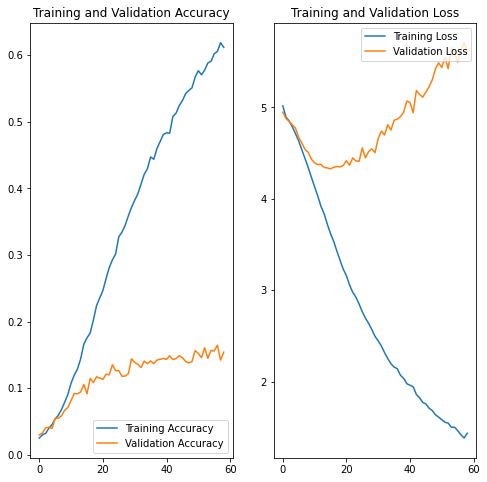

In [ ]:
#the code below to plot accuracy and loss curves were used in Google's tutorial
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(len(history.epoch))
plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')
plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [ ]:
model.save('/content/drive/Shareddrives/apm_cnn_trial/trial_2/regular_cnn/saved_models/plain_cnn_10') 

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: /content/drive/Shareddrives/apm_cnn_trial/trial_2/regular_cnn/saved_models/plain_cnn_10/assets


In [ ]:
test_ds = tf.keras.preprocessing.image_dataset_from_directory(
    '/content/drive/Shareddrives/apm_cnn_trial/trial_2/test_brand_and_model_2',
    seed=42,
    image_size=image_size,
    batch_size=batch_size,
)


Found 3237 files belonging to 157 classes.


In [ ]:
model.evaluate(test_ds)#test accuracy

81/81 [==============================] - 1163s 14s/step - loss: 5.4048 - accuracy: 0.1563


[5.404812335968018, 0.1563175767660141]